In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 1. 加载CSV数据集
data = pd.read_csv('poverty_data.csv')
# data = pd.read_csv('sample.csv')



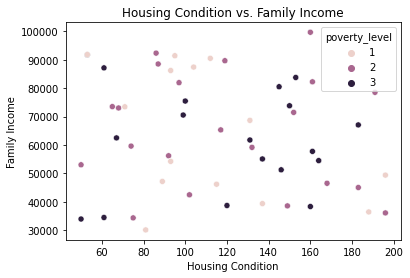

In [13]:
# 绘制散点图，显示住房条件与收入水平的关系
sns.scatterplot(data=data, x='housing_condition', y='family_income', hue='poverty_level')
plt.title('Housing Condition vs. Family Income')
plt.xlabel('Housing Condition')
plt.ylabel('Family Income')
plt.show()


/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21338 (\N{CJK UNIFIED IDEOGRAPH-535A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31185 (\N{CJK UNIFIED IDEOGRAPH-79D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30805 (\

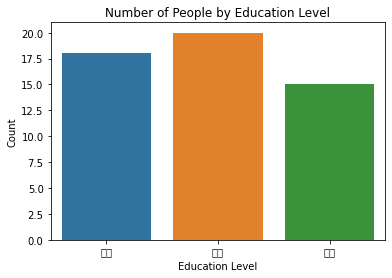

In [14]:
sns.countplot(data=data, x='education_level')
plt.title('Number of People by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21338 (\N{CJK UNIFIED IDEOGRAPH-535A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22763 (\N{CJK UNIFIED IDEOGRAPH-58EB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31185 (\N{CJK UNIFIED IDEOGRAPH-79D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30805 (\

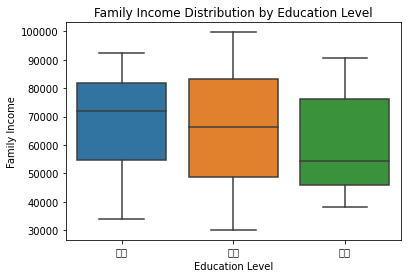

In [15]:
sns.boxplot(data=data, x='education_level', y='family_income')
plt.title('Family Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Family Income')
plt.show()

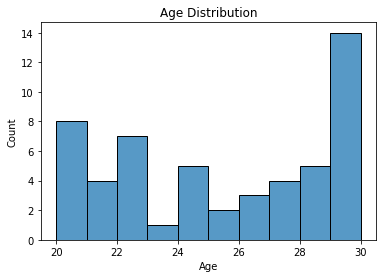

In [16]:
sns.histplot(data=data, x='age', bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# 2. 数据预处理
# 对分类变量进行编码
gender_encoder = LabelEncoder()
data['gender'] = gender_encoder.fit_transform(data['gender'])

education_level_encoder = LabelEncoder()
data['education_level'] = education_level_encoder.fit_transform(data['education_level'])

major_encoder = LabelEncoder()
data['major'] = major_encoder.fit_transform(data['major'])

financial_aid_encoder = LabelEncoder()
data['financial_aid'] = financial_aid_encoder.fit_transform(data['financial_aid'])


In [8]:
# 提取特征和标签
X = data.drop(columns=['id', 'poverty_level']).values
y = data['poverty_level'].values

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征缩放
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:

# 3. 构建深度学习模型
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(num_features,)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 使用早停法防止过拟合
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")





Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 0.7344 - accuracy: 0.2188

2023-03-27 01:35:06.043391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 420ms/step - loss: 0.6884 - accuracy: 0.2143 - val_loss: 0.8522 - val_accuracy: 0.4545
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 0.7082 - accuracy: 0.2812

2023-03-27 01:35:06.445843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 29ms/step - loss: 0.6634 - accuracy: 0.2857 - val_loss: 0.8190 - val_accuracy: 0.5455
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 0.6058 - accuracy: 0.3095 - val_loss: 0.7935 - val_accuracy: 0.5455
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 0.5611 - accuracy: 0.4048 - val_loss: 0.7697 - val_accuracy: 0.6364
Epoch 5/100
2/2 [==============================] - 0s 27ms/step - loss: 0.5635 - accuracy: 0.3810 - val_loss: 0.7525 - val_accuracy: 0.5455
Epoch 6/100
2/2 [==============================] - 0s 28ms/step - loss: 0.5424 - accuracy: 0.4048 - val_loss: 0.7392 - val_accuracy: 0.5455
Epoch 7/100
2/2 [==============================] - 0s 29ms/step - loss: 0.5171 - accuracy: 0.3810 - val_loss: 0.7288 - val_accuracy: 0.5455
Epoch 8/100
2/2 [==============================] - 0s 28ms/step - loss: 0.4978 - accuracy: 0.4048 - val_loss: 0.7219 - val_accuracy: 0.5455
Epoch 9/100
2/2 [===============

In [10]:
# 假设这是一个实际学生的数据情况
sample_data = {
    'age': 23,
    'gender': 'M',
    'education_level': '本科',
    'major': '计算机科学',
    'family_income': 50000,
    'family_size': 4,
    'housing_condition': 70,
    'financial_aid': 0
}

# 对分类变量进行编码
sample_data['gender'] = gender_encoder.transform([sample_data['gender']])[0]
sample_data['education_level'] = education_level_encoder.transform([sample_data['education_level']])[0]
sample_data['major'] = major_encoder.transform([sample_data['major']])[0]

# 转换为NumPy数组并应用特征缩放
sample_data_array = np.array(list(sample_data.values())).reshape(1, -1)
sample_data_scaled = scaler.transform(sample_data_array)

# 使用模型进行预测
prediction = model.predict(sample_data_scaled)

# 输出预测结果
predicted_class = np.argmax(prediction)
print(f"预测的贫困等级: {predicted_class}")


预测的贫困等级: 2


2023-03-27 01:35:07.584937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
